In [10]:
import jax.numpy as jnp
from jax import grad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
from sklearn.model_selection import train_test_split


data = pd.read_csv('Q2.csv')
data = data[~np.isnan(data).any(axis=1)]
data_x = data.drop(labels=['transactiondate','latitude','longitude','price'],axis=1)
data_y = data['price']

min_max_scaler = preprocessing.MinMaxScaler()
data_x = min_max_scaler.fit_transform(data_x)
data_x = pd.DataFrame(data_x)
train_x,test_x,train_y,test_y = train_test_split(
    data_x,
    data_y,
    train_size = 0.5,
    shuffle=False)


In [21]:
w = np.array([1,1,1,1], dtype=float)
def lossFunc(w_t, x, y):
  return np.sum( (jnp.sqrt(((y - jnp.dot(w_t, x.T))**2)/4 + 1) - 1) ) / 204


length = train_x.shape[0]
w = np.array([1,1,1,1], dtype=float)
iteration = 0

one_test_x = test_x.values
one_test_x = np.insert(one_test_x, 0, 1.0, axis=1)
one_train_x = train_x.values
one_train_x = np.insert(one_train_x, 0, 1.0, axis=1)

x_k = []
x_k.append(w)
loss_k = []
while 1 == 1:
  W_grad = grad(lossFunc, argnums=0, allow_int=True)(w.T, one_train_x, train_y.values)
  loss_k.append(lossFunc(w.T, one_train_x, train_y.values))
  
  w = w - W_grad
  x_k.append(w)
  iteration += 1
  if (iteration > 1):
    if (np.abs(loss_k[-1] - loss_k[-2]) < 0.0001):
      break
print(iteration)


1307


In [22]:
loss_k[1306]

DeviceArray(2.4737415, dtype=float32)

The total iteration:1307
The final weight vector is[ 37.056965 -12.684172 -22.388344  22.195488]
The train loss is 2.4736413955688477
The test loss is 2.6956610679626465


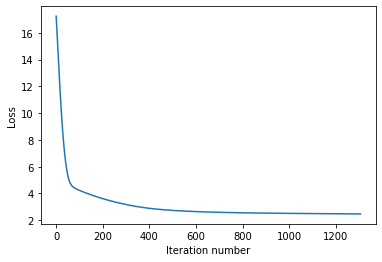

In [13]:
print(f"The total iteration:{iteration}")
print(f"The final weight vector is{x_k[-1]}")
print(f"The train loss is {lossFunc(x_k[-1].T, one_train_x, train_y.values)}\nThe test loss is \
{lossFunc(x_k[-1].T, one_test_x, test_y.values)}")
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_k)
plt.xlabel("Iteration number")
plt.ylabel("Loss")
plt.show()